# CHAPTER 20: Convergence Analysis II: Stochastic Subgradient Algorithms

### This code runs simulations for Example 2 and generates figure 1 from Chapter 20: Convergence Analysis II: Stochastic Subgradient Algorithms (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## *Example 20.2 $\ell_1-$regularized MSE risk*

We illustrate the behavior of the stochastic subgradient algorithm, with and without exponential smoothing, by applying it to the minimization of an $\ell_1-$regularized  MSE risk of the form: 
$$
w^{o} \triangleq \underset{w}{\arg\min} \left\{ P(w) \triangleq \alpha\|w\|_1 + \mathbb{E}(\boldsymbol{\gamma} - \mathbf{h}^\intercal w)^2 \right\} \tag{20.77}
$$


The streaming data samples $(\boldsymbol{\gamma}(n),\mathbf{h}_n)$ are assumed to arise from the linear model:

$$
\boldsymbol{\gamma}(n) = \mathbf{h}_n^\intercal \mathbf{w}^\bullet + \mathbf{v}(n) \tag{20.78}
$$

for some parameter $w^{\bullet}\in\mathbb{R}^{M}$ and where $\mathbf{v}(n)$ is white noise with zero mean and variance $\sigma_v^2$; the noise is independent of all other random variables. We assume that the data $\{\boldsymbol{\gamma},\mathbf{h}\}$ have zero means with second-order moments given by 

$$
\begin{align*}
\sigma_{\gamma}^2 & \triangleq \mathbb{E}[\boldsymbol{\gamma}^2] \\
r_{h\gamma} & \triangleq \mathbb{E}[\mathbf{h}\boldsymbol{\gamma}] \\
R_h & \triangleq \mathbb{E}[\mathbf{h}\mathbf{h}^\intercal] = \sigma_h^2 \mathbf{I}_M
\end{align*} \tag{20.79}
$$


If we multiply both sides of ($20.78$) by $\mathbf{h}_n$ and take expectations, we find that $w^{\bullet}$ satisfies

$$
r_{h\gamma} = \sigma_h^2 \, \mathbf{w}^\bullet \tag{20.80}
$$

 Expanding ($20.77$) we get
 
\begin{align}
P(w) &= \alpha\|w\|_1 + \mathbb{E}(\boldsymbol{\gamma} - \mathbf{h}^\intercal w)^2 \nonumber \\
&= \alpha\|w\|_1 + \mathbb{E}(\mathbf{h}^\intercal \mathbf{w}^\bullet + \mathbf{v} - \mathbf{h}^\intercal w)^2 \nonumber \\
&= \alpha\|w\|_1 + \sigma_h^2 \|w - \mathbf{w}^\bullet\|^2 + \sigma_v^2 \tag{20.81}
\end{align} 


Comparing with ($11.31$)--($11.32$) we can write down a closed-form expression for the minimizer $w^o$ of $P(w)$ in terms of the soft-thresholding operator  defined by ($11.18$): 

$$
w^o = \mathbb{T}_{\frac{\alpha}{2\sigma_h^2}}(w^\bullet) \tag{20.82}
$$


We know from result ($20.19$) that the affine factor $\delta_2$ for the subgradients of $P(w)$ is given by $\delta_2=2\alpha \sqrt{M}.$ Moreover, subtracting ($20.16c$) and ($20.17a$), with both expressions evaluated at $w_2\leftarrow \mathbf{w}_{n-1}$ and at the data sample $(\boldsymbol{\gamma}(n),\mathbf{h}_n)$, we find that the gradient noise is given by

\begin{align}
& \mathbf{g}_n(\mathbf{w}_{n-1}) \nonumber \\
& = 2(r_{h\gamma} - \sigma_h^2 \mathbf{w}_{n-1}) - 2\mathbf{h}_n(\boldsymbol{\gamma}(n) - \mathbf{h}_n^\intercal \mathbf{w}_{n-1}) \nonumber \\
& \stackrel{(20.80)}{=} 2\sigma_h^2(\mathbf{w}^\bullet - \mathbf{w}_{n-1}) - 2\mathbf{h}_n\mathbf{h}_n^\intercal (\mathbf{w}^\bullet + \mathbf{v}(n) - \mathbf{w}_{n-1}) \nonumber \\
& \stackrel{(a)}{=} 2\sigma_h^2(\mathbf{w}^\bullet - \mathbf{w}^o + \mathbf{w}^o - \mathbf{w}_{n-1}) - 2\mathbf{h}_n\mathbf{h}_n^\intercal (\mathbf{w}^\bullet + \mathbf{v}(n) - \mathbf{w}^o + \mathbf{w}^o - \mathbf{w}_{n-1}) \nonumber \\
& \stackrel{(b)}{=} 2(\sigma_h^2 \mathbf{I}_M - \mathbf{h}_n\mathbf{h}_n^\intercal) \tilde{\mathbf{w}}_{n-1} - 2\mathbf{h}_n\mathbf{h}_n^\intercal \mathbf{v}(n) + 2(\mathbf{h}_n\mathbf{h}_n^\intercal - \sigma_h^2 \mathbf{I}_M) \tilde{w}^\bullet \nonumber \tag{20.83}
\end{align}

where in step $(a)$ we added and subtracted the minimizer $w^o$, and in step $(b)$ we used $\tilde{\mathbf{w}}_{n-1}=w^{o}-\mathbf{w}_{n-1}$ and $\tilde{w}^{\bullet}=w^o-w^{\bullet}$.  Conditioning on $\mathbf{w}_{n-1}$, squaring both sides and taking expectations we arrive at the following bound for the second-order moment of the gradient noise:


\begin{align}
\mathbb{E}\left(\|\mathbf{g}_n(\mathbf{w}_{n-1})\|^2 \,|\, \mathbf{w}_{n-1}\right) & \leq \beta_g^2\|\tilde{w}_{n-1}\|^2 + \delta_g^2 \tag{20.84a} \\
\beta_g^2 & \triangleq 4\,\mathbb{E}\left\|\sigma_h^2 \mathbf{I}_M - \mathbf{h}\mathbf{h}^\intercal\right\|^2 \tag{20.84b} \\
\sigma_g^2 & = 4\sigma_v^2 \sigma_h^2 M + \beta_g^2 \|\tilde{w}^\bullet\|^2 \tag{20.84c}
\end{align}


We deduce from ($20.73b$) that the excess risk for the stochastic subgradient algorithm with exponential smoothing will be within the following region:

\begin{equation}
\limsup_{n\rightarrow\infty}\;\left(\mathbb{E} P(\bar{\mathbf{w}}_n) - P(\mathbf{w}^{\star})\right) = O\left(\frac{\mu(2\delta_2^2+\sigma_g^2)}{2}\right) \tag{20.85}
\end{equation}


in terms of the parameters $(\delta_2^2,\sigma_g^2)$ that we have identified for the current problem. 

We simulate the following scenario. We set $M=50$, $\alpha=0.002,$ $\mu=0.001$, $\sigma_v^2=0.01$, $\sigma_h^2=1$, and $\kappa=0.9980$. The entries of $\mathbf{h}$ and $\mathbf{v}$ are Gaussian distributed with zero mean. We generate a random \textit{sparse} model $w^{\bullet}$ with only two nonzero entries set equal to 1, while all other entries are set to $0$. For each run of the algorithms listed below, we generate $N=10,000$ data realizations $\{\gamma(n),h_n\}$. We run the stochastic subgradient algorithm with and without exponential smoothing, namely, 

$$
w_n = w_{n-1} + 2\mu h_n\left(\gamma(n) - h_n^\intercal w_{n-1}\right) - \mu\,\alpha\,\text{sign}(w_{n-1}) \tag{20.86}
$$

and 

\begin{equation}
\left\{
\begin{aligned}
w_n & = w_{n-1} + 2\mu h_n\left(\gamma(n)-h_n^\intercal w_{n-1}\right) - \mu\alpha\operatorname{sign}(w_{n-1}) \\
S_{n+1} & = \kappa S_n + 1 \\
\bar{w}_{n+1} & = \left(1 - \frac{1}{S_{n+1}}\right)\bar{w}_{n} + \frac{1}{S_{n+1}}w_n
\end{aligned}
\right.
\tag{20.87}
\end{equation}


For comparison purposes, we also apply the traditional stochastic gradient algorithm without any regularization to estimate $w^{\bullet}$ by using

$$
w_n = w_{n-1} + 2\mu h_n\left(\gamma(n) - h_n^\intercal w_{n-1}\right) \tag{20.88}
$$

For each run, we use expression ($20.81$) to evaluate the excess risk curve:

$$
P(w) - P(w^{o}) = \alpha\left(\|w\|_1 - \|w^{o}\|_1\right) + \sigma_h^2 \|w - w^\bullet\|^2 - \sigma_h^2 \|\tilde{w}^\bullet\|^2 \tag{20.89}
$$


and average the curves over 50 experiments. The results are shown in Fig. $20.1$ using the logarithmic  scale; each curve shows the evolution of $10\log_{10}(P(w_n)-P(w^{o}))$. We will learn in a future chapter when discussing the addition of regularization terms such as $\alpha\|w\|_1$ to the risk function, that the resulting minimizer $w^o$ will tend to be sparse. For this reason, stochastic subgradient implementations that exploit this information in their update relations deliver superior performance in comparison to the plain stochastic gradient algorithm ($20.88$), which does not use the regularization information. Observe further that the use of exponential smoothing reduces the convergence rate of the algorithm but leads to improved steady-state performance.

C:\Users\seman\AppData\Local\Temp\ipykernel_8640\4134032217.py:82: RuntimeWarning: divide by zero encountered in log10
  avgER_l = 10 * np.log10(avgER_lx)
C:\Users\seman\AppData\Local\Temp\ipykernel_8640\4134032217.py:83: RuntimeWarning: divide by zero encountered in log10
  avgER_s = 10 * np.log10(avgER_sx)
C:\Users\seman\AppData\Local\Temp\ipykernel_8640\4134032217.py:84: RuntimeWarning: divide by zero encountered in log10
  avgER_a = 10 * np.log10(avgER_ax)


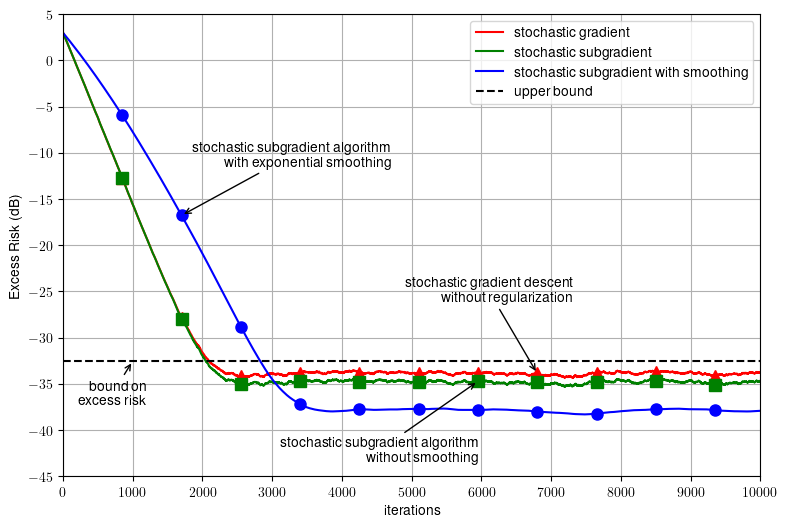

In [65]:
N_Data = 10000  # number of data points
N_Exp = 50      # number of experiments
mu = 0.001      # step-size
alpha = 0.002   # regularization fator

mu_max = 0.001
mu_min = 0.0001
Delta = (mu_max-mu_min)/10
mu_vec = np.arange(mu_min , mu_max + Delta , Delta) # range of step-sizes
J = max(mu_vec.shape)

M = 25         # size of parameter vector
NNZ = 2        # number of nonzero entries (sparsity)

w_0 = np.zeros(M).reshape(-1,1)
random_indices = np.random.randint(1, M, size=NNZ)
w_0[random_indices] = 1 # sparse vector used to generate data 
w_star = np.maximum(0, w_0 - alpha)    # minimizer

sigma_n = 0.1   # noise standard deviation
sigma_u = 1     # feature vector sandard deviation
kappa = 0.9980  # smoothing factor
  
Pl = np.zeros(J).reshape(-1,1) # steady-state excess risk for each mu
Ps = np.zeros(J).reshape(-1,1)
Pa = np.zeros(J).reshape(-1,1)


for jx in range(J):
    mu = mu_vec[jx]

    avgER_l = np.zeros(N_Data).reshape(-1,1)  # averaged learning curve for stochastic gradient
    avgER_s = np.zeros(N_Data).reshape(-1,1) # averaged learning curve for subgradient implementation
    avgER_a = np.zeros(N_Data).reshape(-1,1) # averaged learning curve for subgradient with smoothing

    for j in range(N_Exp): # iterate over experiments
        u = sigma_u * np.random.randn(N_Data, M)
        d = np.dot(u, w_0) + sigma_n * np.random.randn(N_Data).reshape(-1,1)
        a = 0  # a = E \| R_h - h h^T\|^2

        for ii in range(N_Data):
            a += np.linalg.norm(sigma_u**2 * np.eye(M) - np.outer(u[ii, :], u[ii, :]))**2

        a /= N_Data

        w_l = np.zeros((M, N_Data)) # iterate by stochastic gradient
        w_s = np.zeros((M, N_Data)) # iterate by stochastic subgradient
        w_a = w_l.copy()  # iterate by stochastic subgradient with smoothing
        ER_l = np.zeros(N_Data).reshape(-1,1) # learning curve for stochastic gradient
        ER_s = np.zeros(N_Data).reshape(-1,1) # learning curve for stochastic subgradient
        ER_a = np.zeros(N_Data).reshape(-1,1) # learning curve for stochastic subgradient with smoothing
        S_L = 0

        for n in range(1, N_Data):
            w_l[:, n] = w_l[:, n - 1] + 2 * mu * u[n, :] * (d[n] - np.dot(u[n, :], w_l[:, n - 1].reshape(-1,1))) # stochastic gradient
            w_s[:, n] = w_s[:, n - 1] + 2 * mu * u[n, :] * (d[n] - np.dot(u[n, :], w_s[:, n - 1].reshape(-1,1))) - mu * alpha * np.sign(w_s[:, n - 1]) # stochastic subgradient
            S_L = kappa * S_L + 1
            w_a[:, n] = w_s[:, n] / S_L + (1 - 1 / S_L) * w_a[:, n - 1] #  stochastic subgradient with smoothing

            ER_l[n] = sigma_u**2 * np.dot((w_l[:, n].reshape(-1,1) - w_star).T, (w_l[:, n].reshape(-1,1) - w_star)) + alpha * np.linalg.norm(w_l[:, n].reshape(-1,1), 1) - alpha * np.linalg.norm(w_star, 1) - sigma_u**2 * np.dot((w_0 - w_star).T, (w_0 - w_star))
            ER_s[n] = sigma_u**2 * np.dot((w_s[:, n].reshape(-1,1) - w_star).T, (w_s[:, n].reshape(-1,1) - w_star)) + alpha * np.linalg.norm(w_s[:, n].reshape(-1,1), 1) - alpha * np.linalg.norm(w_star, 1) - sigma_u**2 * np.dot((w_0 - w_star).T, (w_0 - w_star))
            ER_a[n] = sigma_u**2 * np.dot((w_a[:, n].reshape(-1,1) - w_star).T, (w_a[:, n].reshape(-1,1) - w_star)) + alpha * np.linalg.norm(w_a[:, n].reshape(-1,1), 1) - alpha * np.linalg.norm(w_star, 1) - sigma_u**2 * np.dot((w_0 - w_star).T, (w_0 - w_star))

        avgER_l += ER_l
        avgER_s += ER_s
        avgER_a += ER_a

    avgER_lx = avgER_l / N_Exp
    avgER_sx = avgER_s / N_Exp
    avgER_ax = avgER_a / N_Exp

    Pl[jx] = np.mean(avgER_lx[-50:])  # Average of the last 50 values
    Ps[jx] = np.mean(avgER_sx[-50:])  # Average of the last 50 values
    Pa[jx] = np.mean(avgER_ax[-50:])  # Average of the last 50 values


avgER_l = 10 * np.log10(avgER_lx) 
avgER_s = 10 * np.log10(avgER_sx) 
avgER_a = 10 * np.log10(avgER_ax) 

delta2 = 2 * alpha * np.sqrt(M)  # delta_2
beta_g2 = 4 * a  # beta_g^2
var_g = 4 * sigma_n**2 * M * sigma_u**2 + beta_g2 * np.linalg.norm(w_0 - w_star)**2  # sigma_g^2

up_bd = 0.5 * mu * (var_g + 2 * delta2**2)  # Bound on excess risk
up_bd = 10 * np.log10(up_bd)

# Create a figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})        
plt.figure(figsize=(9, 6))

# Plot learning curves
plt.plot(range(1, N_Data + 1), avgER_l, 'r', linewidth=1.5, label='stochastic gradient')
plt.plot(range(1, N_Data + 1), avgER_s, 'g', linewidth=1.5, label='stochastic subgradient')
plt.plot(range(1, N_Data + 1), avgER_a, 'b', linewidth=1.5, label='stochastic subgradient with smoothing')

# Plot the upper bound
plt.plot(range(1, N_Data + 1), [up_bd] * N_Data, 'k--', linewidth=1.5, label='upper bound')

# Plot markers
plt.plot(range(1, N_Data + 1, 850), avgER_l[0::850], 'r^', markersize=8, markerfacecolor='r')
plt.plot(range(1, N_Data + 1, 850), avgER_s[0::850], 'gs', markersize=8, markerfacecolor='g')
plt.plot(range(1, N_Data + 1, 850), avgER_a[0::850], 'bo', markersize=8, markerfacecolor='b')

# Set labels, legend, and axis limits
plt.legend()
plt.xlabel('iterations')
plt.ylabel('Excess Risk (dB)')
plt.grid(True)
plt.xlim(0, 10000)
plt.xticks(np.arange(0,10001,1000))
plt.ylim(-45, 5)
plt.yticks(np.arange(-45,6,5))

# Add annotations
plt.annotate('stochastic subgradient algorithm \n with exponential smoothing', xy= (850*2, avgER_a[850*2]), 
            xytext= (850*2+3000, avgER_a[850*2]+5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
            fontweight='bold',ha='right', va='bottom')

plt.annotate('stochastic subgradient algorithm \n without smoothing', xy= (850*7, avgER_s[850*7]), 
            xytext= (850*7, avgER_s[850*7]-9), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
            fontweight='bold',ha='right', va='bottom')

plt.annotate('stochastic gradient descent \n without regularization', xy= (850*8, avgER_l[850*8]), 
            xytext= (850*8+500, avgER_l[850*8]+7.5), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
            fontweight='bold',ha='right', va='bottom')

plt.annotate('bound on \n excess risk', xy= (1000, up_bd), xytext= (1000+200, up_bd-5), 
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), fontweight='bold',ha='right', va='bottom')

# Show the plot
plt.show()

**Figure $20.1$** Learning curves in logarithmic scale for the stochastic gradient algorithm ($20.88$), and for the stochastic subgradient algorithms ($20.86$)--($20.87$) with and without smoothing. The horizontal line shows the value of the bound on the right-hand side of ($20.85$).